# Question 1

In [36]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def extractioncsv(fichiercsv):
    liste = []
    with open(fichiercsv, encoding= 'utf8') as fcsv:
        lecteur = csv.reader(fcsv, delimiter=';')
        for ligne in lecteur:
            liste.append(ligne)
    return liste

TennisChiffres=extractioncsv("TennisChiffresTop100_2018.csv")

In [3]:
def convert_to_float(tableau):
    L = tableau
    n = len(tableau[0])
    for i in range (1, len(tableau)):
        for j in range (1, n):
            L[i][j] = float(tableau[i][j])
            
    return L

In [4]:
bla = convert_to_float(TennisChiffres)
bla = np.array(bla)
bla[0][0] = 'Players'

# Question 2

In [5]:
blabla = pd.DataFrame(bla[1:], columns = bla[0])
blabla.set_index('Players', inplace = True)
blabla = blabla.astype(float)

In [6]:
blabla

,Moyenne 1 er service,Pourcent 1 er service,Balles break sauvees,Balles break gagnees,Pts gagnes 1 er service,Pts gagnes au retour
Players,,,,,,
Bautista,179.0,81.0,84.0,26.0,78.0,63.0
Berdych,189.0,68.0,85.0,26.0,82.0,63.0
Cilic,191.0,70.0,82.0,25.0,86.0,60.0
Del Potro,196.0,78.0,88.0,26.0,90.0,58.0
Dimitrov,195.0,64.0,94.0,19.0,81.0,53.0
...,...,...,...,...,...,...
,178.0,86.0,85.0,29.0,91.0,66.0
,177.0,82.0,83.0,27.0,87.0,66.0
,176.0,86.0,86.0,29.0,88.0,65.0


In [7]:
blabla.index

Index(['Bautista', 'Berdych', 'Cilic', 'Del Potro', 'Dimitrov', 'Djokovic',
       'Federer', 'Ferrer', 'Gasquet', 'Goffin', 'Isner', 'Johnson',
       'Karlovic', 'Kohlschreiber', 'Kyrgios', 'Lopez', 'Murray', 'Nadal',
       'Nishikori', 'Pouille', 'Raonic', 'Simon', 'Thiem', 'Querrey', 'Tsonga',
       'Wawrinka', 'Zverev', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', ''],
      dtype='object', name='Players')

In [8]:
blabla.describe()['Moyenne 1 er service']['mean']

183.76767676767676

In [9]:
def create_correlation_matrix(df):
    len_columns = blabla.shape[1]
    len_rows = blabla.shape[0]
    dataframe = df.copy()
    for column in df.columns:
        column_mean = df.describe()[column]['mean']
        column_std = df.describe()[column]['std']
        for row in df.index:
            dataframe[column][row] = (df[column][row] - column_mean) / column_std
    matrix = np.dot(dataframe.T, dataframe)
    matrix = np.dot(1/len_rows, matrix)
    correlation_df = pd.DataFrame(matrix, index = df.columns, columns = df.columns)
    return correlation_df

In [10]:
correlation_matrix = create_correlation_matrix(blabla)

In [11]:
correlation_matrix


,Moyenne 1 er service,Pourcent 1 er service,Balles break sauvees,Balles break gagnees,Pts gagnes 1 er service,Pts gagnes au retour
Moyenne 1 er service,0.989899,-0.769802,0.542429,-0.654339,0.376047,-0.526476
Pourcent 1 er service,-0.769802,0.989899,-0.441760,0.733447,-0.321994,0.643689
Balles break sauvees,0.542429,-0.441760,0.989899,-0.427289,0.345209,-0.571387
Balles break gagnees,-0.654339,0.733447,-0.427289,0.989899,-0.236000,0.678284
Pts gagnes 1 er service,0.376047,-0.321994,0.345209,-0.236000,0.989899,-0.325777
Pts gagnes au retour,-0.526476,0.643689,-0.571387,0.678284,-0.325777,0.989899


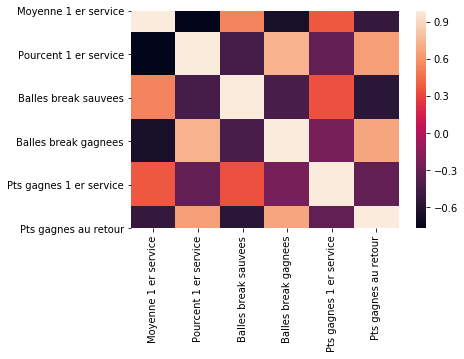

In [12]:
ax = sns.heatmap(correlation_matrix)

# Question 3

In [13]:
def projection (dataframe):
    df = dataframe.copy()
    df.reset_index(inplace = True)
    correlation_matrix = create_correlation_matrix(dataframe)
    w, v = np.linalg.eig(correlation_matrix)
    u_1 = v[:,0]
    u_2 = v[:,1]
    X = []
    Y = []

    for i in df.index:
        X.append(np.dot(np.array(df.loc[i][1:]), u_1))
        Y.append(np.dot(np.array(df.loc[i][1:]), u_2))
#     plt.scatter(X,Y)
    return X,Y

In [14]:
projection(blabla)

([-56.406727429969585,
  -68.2817851316693,
  -69.93823028692762,
  -72.23302938503458,
  -83.29542305688778,
  -64.21130959726975,
  -62.8119587194834,
  -56.310538053501325,
  -68.54974369344555,
  -69.7511394768853,
  -88.77050251713825,
  -86.35896344833104,
  -87.98204736360391,
  -50.56668677372603,
  -86.30830411482827,
  -85.99002539240053,
  -53.54773317266257,
  -56.15224423812294,
  -65.84329817653658,
  -62.78654501764623,
  -82.2173562339155,
  -52.441139799082,
  -52.244559027255136,
  -56.528703342963496,
  -64.98602847491114,
  -74.33247758437346,
  -72.07746892256665,
  -73.12912724042337,
  -66.73247796968928,
  -67.03702363072276,
  -65.69100226156974,
  -69.03680797327375,
  -68.22015320640807,
  -69.18599710508737,
  -71.88933491074727,
  -66.25602101702998,
  -73.83875337985991,
  -69.00127767882253,
  -67.81118518271545,
  -74.02343618708699,
  -72.27180493591584,
  -68.43728036808355,
  -69.91853713958092,
  -66.14913969018092,
  -90.76153132657063,
  -84.000244

# Question 4

In [15]:
w, v = np.linalg.eig(correlation_matrix)
lamda1 = w[0]
lamda2 = w[1]
u_1 = v[:,0]
u_2 = v[:,1]
p = 6
X= []
Y=[]

for i in range (p):
    ri1 = u_1[i] * np.sqrt(lamda1)
    ri2 = u_2[i] * np.sqrt(lamda2)
    X.append(ri1)
    Y.append(ri2)
    


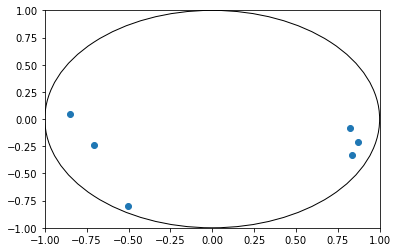

In [16]:
circle = plt.Circle((0,0),1, fill =False)

fig, ax = plt.subplots()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.add_artist(circle)
ax.scatter(X,Y)

# Question 5

On observe trois ensembles sur la figure de l'ACP, à gauche, au centre et à droite. On a donc envie de prendre k=3

# Question 6

In [17]:
k = 3 # nombre de clusters

In [38]:
A, B = projection(blabla)
X = np.array(list(zip(A, B)))

In [19]:
def update_cluster_center(X,Y):
    x = X.sum()/(len(X))
    y = Y.sum()/(len(Y))
    return x,y

In [20]:
def create_random_cluster_center(A,B, k = 3):
    X = pd.Series(A)
    Y = pd.Series(B)
    Z = pd.concat(X,Y)
    return Z
    

In [21]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [34]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = [A[0], A[1], A[2]]
# Y coordinates of random centroids
C_y = [B[0], B[1], B[2]]
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ -56.406727 -112.992   ]
 [ -68.281784 -113.21669 ]
 [ -69.93823  -115.62656 ]]


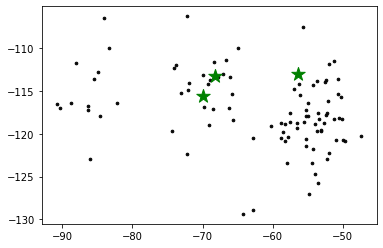

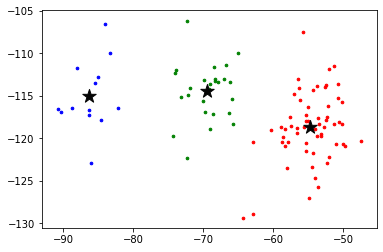

In [37]:
# Plotting along with the Centroids
plt.scatter(A, B, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')